<a href="https://colab.research.google.com/github/bbalbo/Various/blob/main/ds_jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/drive/MyDrive/ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

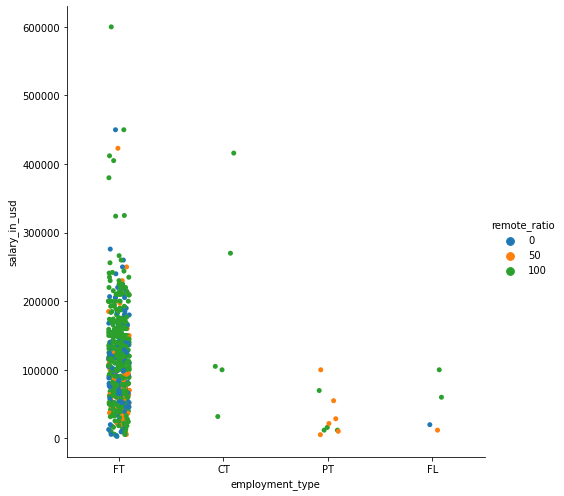

In [19]:
sns.catplot(x='employment_type', y='salary_in_usd', data=df, height=7, hue='remote_ratio')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [23]:
df.duplicated().sum()

0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [29]:
X=df.drop(columns=['Unnamed: 0','salary_in_usd'])
y=df['salary_in_usd']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [35]:
scaler=StandardScaler()
ohe=OneHotEncoder(handle_unknown='ignore')
num_selector=make_column_selector(dtype_include='number')
cat_selector=make_column_selector(dtype_include='object')

In [37]:
num_tuple=(scaler,num_selector)
cat_tuple=(ohe, cat_selector)

In [39]:
transformer=make_column_transformer(num_tuple, cat_tuple)

In [40]:
X_train=transformer.fit_transform(X_train)
X_test=transformer.transform(X_test)

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rf=RandomForestRegressor(random_state=42, n_estimators=100)

In [46]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [47]:
rf.score(X_test, y_test)

0.9661680569947725